## Знакомство с pandas

pandas — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные» (англ. panel data), используемого для описания многомерных структурированных наборов информации. 



https://khashtamov.com/ru/pandas-introduction/

https://habr.com/ru/company/ruvds/blog/442516/

https://proglib.io/p/pandas-tricks/

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

Основные возможности библиотеки:

    - Объект DataFrame для манипулирования индексированными массивами двумерных данных
    - Инструменты для обмена данными между структурами в памяти и файлами различных форматов
    - Встроенные средства совмещения данных и способы обработки отсутствующей информации
    - Переформатирование наборов данных, в том числе создание сводных таблиц
    - Срез данных по значениям индекса, расширенные возможности индексирования, выборка из больших наборов данных
    - Вставка и удаление столбцов данных
    - Возможности группировки позволяют выполнять трёхэтапные операции типа «разделение, изменение, объединение» (англ. split-apply-combine).
    - Слияние и объединение наборов данных
    - Иерархическое индексирование позволяет работать с данными высокой размерности в структурах меньшей размерности
    - Работа с временными рядами: формирование временных периодов и изменение интервалов и так далее

Библиотека оптимизирована для высокой производительности, наиболее важные части кода написаны на Cython и Си. 

In [2]:
#импортируем библиотеку pandas
import pandas as pd


In [3]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(d)
df

,col1,col2
0,1,3
1,2,4


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [6]:
#Создание таблицы с помощью открытия csv файла
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/landing/master/train.csv') 
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Описываем датасет с технической точки зрения: длина, типы данных и пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Описываем датасет с семантической точки зрения: количество значений, среднее, стандартное отклонение и т.д

# df.describe()
df.describe(include=['O'])
# df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ford, Mr. William Neal",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [19]:
age = df['Age']

In [20]:
mean_age = age.mean()

In [21]:
mean_age

29.69911764705882

In [30]:
#normalize=False
round(df['Pclass'].value_counts(normalize=True), 2)*100

3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64

In [27]:
round(df['Pclass'].value_counts(normalize=True), 2) *100

3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64

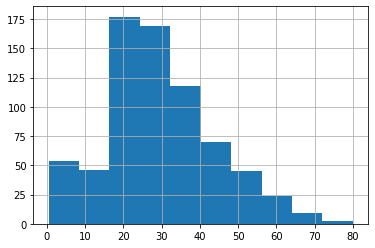

In [29]:
import matplotlib 
df['Age'].hist()

In [36]:
df['Возраст'] = df['Age']

In [40]:
df = df.drop(['Возраст'], axis=1)

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df['New'] = [i for i in range(len(df))]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,886
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,887
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,888
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,889


In [44]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
need = df[cols]

In [61]:
df[0:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,5
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,6


In [62]:
df[5:10:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,5
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,7
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,9


In [53]:
james = df[df.Name.str.contains('James')]
len(james)

24

In [52]:
print(list(df))



['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'New']


In [11]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [12]:
df.loc[5:8, ['Survived', 'Pclass']]

,Survived,Pclass
5,0,3
6,0,1
7,0,3
8,1,3


In [13]:
df.iloc[3:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [53]:
df.iloc[0:3, 0:2]

,PassengerId,Survived
0,1,0
1,2,1
2,3,1


In [46]:
df[df['Age'] > 30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,6
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S,873
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,879
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,881
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,885


In [51]:
df[(df.Age > 20) & (df.Age < 40)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,884
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,885
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,886
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,889


In [58]:
first = df[df['Pclass'] == 1]
second = df[df['Pclass'] == 2]
third = df[df['Pclass'] == 3]


In [69]:
first_median = first.Age.median() 

In [68]:
second_median = second.Age.median() 

In [67]:
third_median = third.Age.median() 

In [56]:
df[(df.Age > 20) & (df.Sex == 'male') & (df.Name.str.contains('James'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S,134
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,150
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,174
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S,221
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,512
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q,525
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S,551
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S,582
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S,592
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,696


In [17]:
import numpy as np
rand = np.random.rand(891)

In [18]:
df['rand'] = rand
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.654468
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.030564
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.570746
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.431105
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.367612


In [59]:
df['Alone'] = df.apply(lambda x: 'not_alone' if x['SibSp']  or x['Parch'] > 0 else 'alone', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5,not_alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,not_alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,not_alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5,alone


### Пропущенные значения

In [72]:
df['Age'].isna().sum()g

177

In [21]:
#inplace = False, если хотим заменить датафрейм то меняем на True
df.dropna(how='any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rand,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.030564,not_alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.431105,not_alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.724114,alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.286250,not_alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.652761,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.265673,not_alone
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.406155,alone
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.177689,not_alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.869667,alone


In [66]:
a = df.groupby('Pclass')
a.agg('mean')['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Принцип действия **groupby**
![](https://i.stack.imgur.com/sgCn1.jpg)

- Разделение данных по группап по определенному критерию

- Применение к каждой группе определенной функции

- Сложение результатов в единую структуру

In [74]:
df.groupby('Pclass').agg('median')['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [24]:
df.groupby(['Age', 'Fare']).sum()

PassengerId  Survived  Pclass  SibSp  Parch      rand
Age   Fare                                                          
0.42  8.5167           804         1       3      0      1  0.545396
0.67  14.5000          756         1       2      1      1  0.609618
0.75  19.2583         1115         2       6      4      2  1.232874
0.83  18.7500          832         1       2      1      1  0.179134
      29.0000           79         1       2      0      2  0.405361
...                    ...       ...     ...    ...    ...       ...
70.50 7.7500           117         0       3      0      0  0.635964
71.00 34.6542           97         0       1      0      0  0.262203
      49.5042          494         0       1      0      0  0.191312
74.00 7.7750           852         0       3      0      0  0.839485
80.00 30.0000          631         1       1      0      0  0.168352

[638 rows x 6 columns]

#### Заменить пропущенные значения в столбце Age медианным значением возраста


In [25]:
df.fillna(df['Age'].median())['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [35]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])

df

,A,B
0,4,9
1,4,9
2,4,9


In [36]:
df['C'] = df['A'].apply(lambda x: x*2)
df

,A,B,C
0,4,9,8
1,4,9,8
2,4,9,8


In [27]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.066409
SibSp            0.523008
Parch            0.381594
Fare            32.204208
rand             0.509828
dtype: float64

In [28]:
### Работа с текстовыми данными

s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [48]:
df = pd.DataFrame({"A": ["small", "large", "large", "small",

                         "small", "large", "small", "small",

                         "large"],

                   "B": [1, 2, 2, 3, 3, 4, 5, 6, 7],

                   "C": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C
0,small,1,2
1,large,2,4
2,large,2,5
3,small,3,5
4,small,3,6
5,large,4,6
6,small,5,8
7,small,6,9
8,large,7,9


In [50]:
table = pd.pivot_table(df, values='B', index=['A'],

                    columns=['C'], aggfunc=np.sum)
table

C,2,4,5,6,8,9
A,,,,,,
large,NaN,2.0,2.0,4.0,NaN,7.0
small,1.0,NaN,3.0,3.0,5.0,6.0


### Время и даты в pandas

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/alnagaev/reni_land/master/test.csv')
df.head()

,id,Дата рождения,Вакансия,Технология,Локация,З/п в валюте найма
0,1,18.04.1994,Инженер-программист 2 категории,JS,Санкт-Петербург,"140 000,00 ₽"
1,2,27.03.1993,Разработчик информационных систем,.NET,Москва,"130 000,00 ₽"
2,3,24.11.1983,Java Developer,Java,Санкт-Петербург,"200 000,00 ₽"
3,4,09.06.1989,Архитектор ПО,Java,Москва,"250 000,00 ₽"
4,5,03.10.1978,QA Automation Engineer,QA,Санкт-Петербург,"172 413,00 ₽"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  58 non-null     int64 
 1   Дата рождения       58 non-null     object
 2   Вакансия            58 non-null     object
 3   Технология          58 non-null     object
 4   Локация             58 non-null     object
 5   З/п в валюте найма  58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [77]:
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'])



In [78]:
df['Дата рождения'].dt.year

0     1994
1     1993
2     1983
3     1989
4     1978
5     1973
6     1991
7     1982
8     1988
9     1990
10    1991
11    1982
12    1988
13    1990
14    1986
15    1982
16    1984
17    1995
18    1972
19    1985
20    1990
21    1991
22    1970
23    1987
24    1989
25    1991
26    1991
27    1990
28    1992
29    1990
30    1992
31    1983
32    1981
33    1994
34    1988
35    1977
36    1988
37    1990
38    1988
39    1992
40    1986
41    1989
42    1989
43    1996
44    1978
45    1985
46    1979
47    1989
48    1992
49    1985
50    1987
51    1987
52    1993
53    1991
54    1985
55    1976
56    1986
57    1989
Name: Дата рождения, dtype: int64

In [79]:
df['age'] = 2020 - df.iloc[:, 1].dt.year
df

,id,Дата рождения,Вакансия,Технология,Локация,З/п в валюте найма,age
0,1,1994-04-18,Инженер-программист 2 категории,JS,Санкт-Петербург,"140 000,00 ₽",26
1,2,1993-03-27,Разработчик информационных систем,.NET,Москва,"130 000,00 ₽",27
2,3,1983-11-24,Java Developer,Java,Санкт-Петербург,"200 000,00 ₽",37
3,4,1989-09-06,Архитектор ПО,Java,Москва,"250 000,00 ₽",31
4,5,1978-03-10,QA Automation Engineer,QA,Санкт-Петербург,"172 413,00 ₽",42
5,6,1973-08-21,Big Data Developer,Big Data,Санкт-Петербург,"280 000,00 ₽",47
6,7,1991-10-10,JS Developer,JS,Москва,"129 000,00 ₽",29
7,8,1982-08-16,Разработчик мобильных приложений,Android,Москва,"185 000,00 ₽",38
8,9,1988-05-16,Инженер-программист 2 категории,.NET,Санкт-Петербург,"160 000,00 ₽",32
9,10,1990-01-12,Java Engineer,Java,Краков; Польша,"9 500,00 zł",30


In [80]:
df.to_csv('head_table.csv')